In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-02-03 16:59:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

FuelConsumption.csv 100%[===================>]  70.93K   139KB/s    in 0.5s    

2022-02-03 16:59:08 (139 KB/s) - 'FuelConsumption.csv' saved [72629/72629]



In [3]:
df = pd.read_csv('FuelConsumption.csv')

In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

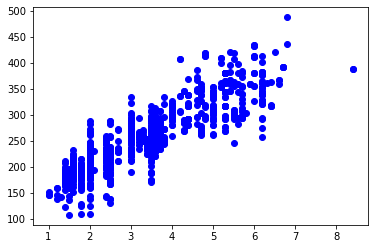

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [11]:
# PolynomialFeatures() function in scikit-learn library, drives a new feature set from the original feature set.
# a matrix will be generated consisting of all polynomial combinations 
# of the features with degree less than or equal to the specified degree. 
# eg. if original feature set has only one feature, ENGINESIZE 
# if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asarray(train[['ENGINESIZE']])
train_y = np.asarray(train[['CO2EMISSIONS']])

test_x = np.asarray(test[['ENGINESIZE']])
test_y = np.asarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

# fit_transform takes x values and outputs a list of data raised from power of 0 to power of 2 
# (as this is what is set above)
# see notes in Python_01 where:
# if:
#     x1 = x
#     x2 = x^2
#     x3 = x^3

# then:

# y_hat = θ0 + θ1x1 + θ2x2 + θ3x3 <--- which is linear

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [12]:
# using linear regression to solve:

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         50.65770229 -1.51959566]]
Intercept:  [106.25332183]


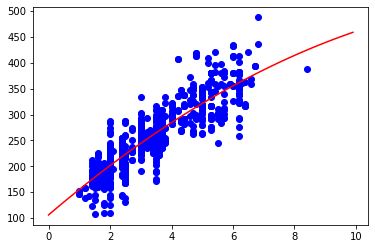

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r')

In [20]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print('MAE: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('RSS (MSE): %.2f' %np.mean((test_y_ - test_y)**2))
print('R2 score: %-2f' % r2_score(test_y, test_y_))

MAE: 22.38
RSS (MSE): 838.11
R2 score: 0.778328
